In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

**Convergence of DFT with respect to the K point sampling**

In [2]:
### Convergence of DFT with respect to K point sampling

## load data 

# gga
pbed3_k111 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBED3_K111')
pbed3_k221 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBED3_K221')
pbed3_k441 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBED3_K441')

# meta gga
scan_k111 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_SCAN_K111')
scan_k221 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_SCAN_K221')
scan_k441 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_SCAN_K441')

# vdw
vdwdf2_k111 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_vdWDF2_K111')
vdwdf2_k221 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_vdWDF2_K221')
vdwdf2_k441 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_vdWDF2_K441')


# hybrids (now placeholder)
pbe0d3atm_k111 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBE0D3_K111')
pbe0d3atm_k221 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBE0D3_K221')
pbe0d3atm_k441 = np.loadtxt('../DATA/DFT_KPOINT_CONVERGENCE//BINDING_ENERGY_PBE0D3_K441')

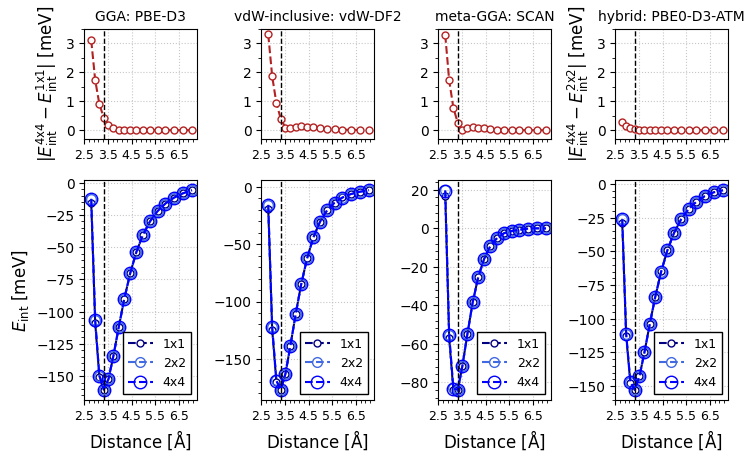

In [3]:
## plot data
cm =1/2.54
start = 2
end = 19
fig, ax = plt.subplots(2,4,figsize=(19*cm,12*cm),gridspec_kw={'height_ratios': [1, 2]})

# gga
ax[0][0].plot(pbed3_k111[start:end,0],np.abs(1000*(pbed3_k441[start:end,1]-pbed3_k111[start:end,1])),
              'o--',c='firebrick',mfc='snow',ms=5)

ax[1][0].plot(pbed3_k111[start:end,0],1000*pbed3_k111[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='1x1')
ax[1][0].plot(pbed3_k221[start:end,0],1000*pbed3_k221[start:end,1],'o--',
              c='royalblue',mfc='none',ms=7,label='2x2')
ax[1][0].plot(pbed3_k441[start:end,0],1000*pbed3_k441[start:end,1],'o--',
              c='blue',mfc='none',ms=9,label='4x4')

ax[0][0].grid(ls='dotted',alpha=.7)
ax[1][0].grid(ls='dotted',alpha=.7)
ax[1][0].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][0].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][0].set_yticks([0,1,2,3])

ax[1][0].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)
ax[1][0].set_ylabel('$E_\mathrm{int}$ [meV]',fontsize=12)
ax[0][0].set_ylabel('$|E_\mathrm{int}^{4\mathrm{x}4}-E_\mathrm{int}^{1\mathrm{x}1}|$ [meV]',fontsize=12)
ax[0][0].set_title('GGA: PBE-D3',fontsize=10)

# vdw inclusive
ax[0][1].plot(vdwdf2_k111[start:end,0],np.abs(1000*(vdwdf2_k441[start:end,1]-vdwdf2_k111[start:end,1])),
              'o--',c='firebrick',mfc='snow',ms=5)

ax[1][1].plot(vdwdf2_k111[start:end,0],1000*vdwdf2_k111[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='1x1')
ax[1][1].plot(vdwdf2_k221[start:end,0],1000*vdwdf2_k221[start:end,1],'o--',
              c='royalblue',mfc='none',ms=7,label='2x2')
ax[1][1].plot(vdwdf2_k441[start:end,0],1000*vdwdf2_k441[start:end,1],'o--',
              c='blue',mfc='none',ms=9,label='4x4')

ax[0][1].grid(ls='dotted',alpha=.7)
ax[1][1].grid(ls='dotted',alpha=.7)
ax[1][1].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][1].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][1].set_yticks([0,1,2,3])

ax[1][1].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)

ax[0][1].set_title('vdW-inclusive: vdW-DF2',fontsize=10)

# meta gga 
ax[0][2].plot(scan_k111[start:end,0],np.abs(1000*(scan_k221[start:end,1]-scan_k111[start:end,1])),
              'o--',c='firebrick',mfc='snow',ms=5,label='2x2')

ax[1][2].plot(scan_k111[start:end,0],1000*scan_k111[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='1x1')
ax[1][2].plot(scan_k221[start:end,0],1000*scan_k221[start:end,1],'o--',
              c='royalblue',mfc='none',ms=7,label='2x2')
ax[1][2].plot(scan_k441[start:end,0],1000*scan_k441[start:end,1],'o--',
              c='blue',mfc='none',ms=9,label='4x4')

ax[0][2].grid(ls='dotted',alpha=.7)
ax[1][2].grid(ls='dotted',alpha=.7)
ax[0][2].set_yticks([0,1,2,3])
ax[1][2].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][2].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[1][2].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)
ax[0][0].set_ylim([-0.3,3.5])
ax[0][1].set_ylim([-0.3,3.5])
ax[0][2].set_ylim([-0.3,3.5])

ax[0][2].set_title('meta-GGA: SCAN',fontsize=10)



# hybrids
ax[0][3].plot(pbe0d3atm_k221[start:end,0],np.abs(1000*(pbe0d3atm_k441[start:end,1]-pbe0d3atm_k221[start:end,1])),
              'o--',c='firebrick',mfc='snow',ms=5,label='2x2')

ax[1][3].plot(pbe0d3atm_k111[start:end,0],1000*pbe0d3atm_k111[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='1x1')
ax[1][3].plot(pbe0d3atm_k221[start:end,0],1000*pbe0d3atm_k221[start:end,1],'o--',
              c='royalblue',mfc='none',ms=7,label='2x2')
ax[1][3].plot(pbe0d3atm_k441[start:end,0],1000*pbe0d3atm_k441[start:end,1],'o--',
              c='blue',mfc='none',ms=9,label='4x4')

ax[0][3].set_ylabel('$|E_\mathrm{int}^{4\mathrm{x}4}-E_\mathrm{int}^{2\mathrm{x}2}|$ [meV]',fontsize=12)

ax[0][3].grid(ls='dotted',alpha=.7)
ax[1][3].grid(ls='dotted',alpha=.7)
ax[0][3].set_yticks([0,1,2,3])
ax[1][3].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[0][3].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[1][3].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)
ax[0][0].set_ylim([-0.3,3.5])
ax[0][1].set_ylim([-0.3,3.5])
ax[0][2].set_ylim([-0.3,3.5])
ax[0][3].set_ylim([-0.3,3.5])

ax[0][3].set_title('hybrid: PBE0-D3-ATM',fontsize=10)

ax[0][0].tick_params('x',labelsize=9)
ax[0][1].tick_params('x',labelsize=9)
ax[0][2].tick_params('x',labelsize=9)
ax[0][3].tick_params('x',labelsize=9)
ax[1][0].tick_params('x',labelsize=9)
ax[1][1].tick_params('x',labelsize=9)
ax[1][2].tick_params('x',labelsize=9)
ax[1][3].tick_params('x',labelsize=9)

ax[1][0].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)
ax[1][1].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)
ax[1][2].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)
ax[1][3].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)


ax[0][0].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[0][1].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[0][2].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[0][3].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[1][0].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[1][1].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[1][2].axvline(x=3.33,ls='dashed',color='black', lw=1)
ax[1][3].axvline(x=3.33,ls='dashed',color='black', lw=1)

ax[0][0].yaxis.set_minor_locator(AutoMinorLocator(2)) 
ax[0][1].yaxis.set_minor_locator(AutoMinorLocator(2)) 
ax[0][2].yaxis.set_minor_locator(AutoMinorLocator(2)) 
ax[0][3].yaxis.set_minor_locator(AutoMinorLocator(2)) 

ax[1][0].yaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][1].yaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][2].yaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][3].yaxis.set_minor_locator(AutoMinorLocator(5)) 

ax[0][0].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[0][1].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[0][2].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[0][3].xaxis.set_minor_locator(AutoMinorLocator(5)) 

ax[1][0].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][1].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][2].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1][3].xaxis.set_minor_locator(AutoMinorLocator(5)) 

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)  # tweak vertical space between rows
plt.show()

**Convergence of DMC with respect to the time step**

In [4]:
### Convergence of DMC with respect to the time step

## load data

#  mpc total energy data in eV

dmc_mpc_5_01 = np.loadtxt('../DATA/DMC_TIME_STEP_ERROR/Total_MPC_Energy_vs_Time_Step_5')
dmc_mpc_24_01 = np.loadtxt('../DATA/DMC_TIME_STEP_ERROR/Total_MPC_Energy_vs_Time_Step_24')

# mpc compute binding energy at each time step 

dmc_mpc_binding_01 = np.zeros_like(dmc_mpc_5_01)

dmc_mpc_binding_01[:,0] = dmc_mpc_5_01[:,0]
dmc_mpc_binding_01[:,1] = dmc_mpc_5_01[:,1] - dmc_mpc_24_01[:,1]
dmc_mpc_binding_01[:,2] = np.sqrt(dmc_mpc_5_01[:,2]**2 + dmc_mpc_24_01[:,2]**2)

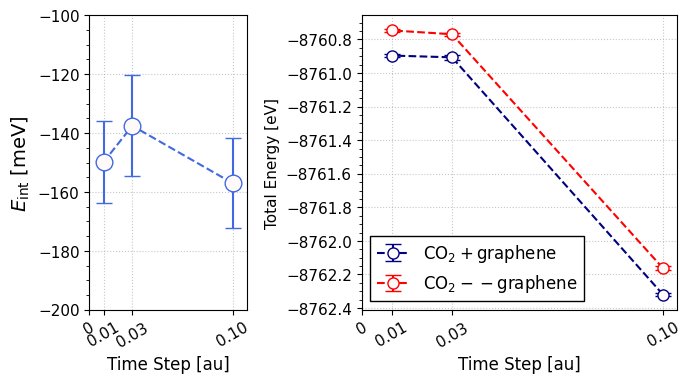

In [5]:
## plot data

fig, ax = plt.subplots(1,2,figsize=(17.8*cm,10*cm),gridspec_kw={'width_ratios': [1, 2]})

#binding energy
ax[0].errorbar(x = dmc_mpc_binding_01[:,0], y = 1000*dmc_mpc_binding_01[:,1], yerr = 1000* dmc_mpc_binding_01[:,2],
               fmt = 'o', ls ='dashed', color ='royalblue',mfc='snow', ms = 12, capsize = 6)
ax[0].set_ylabel('$E_\mathrm{int}$ [meV]', fontsize=14)
ax[0].set_xlabel('Time Step [au]', fontsize=12)
ax[0].tick_params(labelsize=11)
ax[0].set_ylim([-200,-100])

# 5 total energy
ax[1].errorbar(x = dmc_mpc_5_01[:,0], y = dmc_mpc_5_01[:,1], yerr = dmc_mpc_5_01[:,2],
               fmt = 'o', ls ='dashed', color ='navy',mfc='snow', 
               ms = 8, capsize = 6,
               label = '$\mathrm{CO}_2 + \mathrm{graphene}$'
              )
ax[1].set_ylabel('Total Energy [eV]', fontsize=11)
ax[1].set_xlabel('Time Step [au]', fontsize=12)
ax[1].tick_params(labelsize=11)

# 24 total energy
ax[1].errorbar(x = dmc_mpc_24_01[:,0], y = dmc_mpc_24_01[:,1], yerr = dmc_mpc_24_01[:,2],
               fmt = 'o', ls ='dashed', color ='red',mfc='snow',
               ms = 8, capsize = 6,
               label = '$\mathrm{CO}_2 -- \mathrm{graphene}$' 
              )


#ax[0].set_xlim([-0.01,0.11])
ax[0].set_xlim([0,0.11])
ax[0].set_xticks([0,0.01,0.03,0.1])
ax[0].set_xticklabels(labels=['0','0.01','0.03','0.10'],rotation=30)
ax[1].set_xticks([0,0.01,0.03,0.1])
ax[1].set_xticklabels(labels=['0','0.01','0.03','0.10'],rotation=30)

ax[0].yaxis.set_minor_locator(AutoMinorLocator(4)) 
ax[1].yaxis.set_minor_locator(AutoMinorLocator(4)) 

ax[0].grid(ls='dotted',alpha=.7)
ax[1].grid(ls='dotted',alpha=.7)
ax[1].legend(fontsize=12,fancybox=False,edgecolor='black',framealpha=1)
plt.tight_layout()
plt.show()

**Tables for DFT**

In [6]:
# Load data into a dictionary  data['method'] = binding_curve 

path_to_data_for_tables = '../DATA/DFT_BINDING_CURVES/'

data = {}
#DMC
# dmc: remember DMC is the only one that has the 
# configuration idx in the first column instead of the CO2-graphene distance:
# dmc[:,0] is the index in the trajectory, we need it to recover the right C-graphene distance
# dmc[:,1] and dmc[:,2] are binding energy (with MPC) and error bar  

data['DMC'] = np.loadtxt('../DATA/DMC_BINDING_CURVE/Binding_MPC_Energy_vs_Configuration',usecols=(0,1,2)) 

# DFT
# GGA
data['PBE'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'PBE/DISTANCE_TOTALENERGY_BINDINGENERGY_PBE'))
data['PBE-D3'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'PBE-D3/DISTANCE_TOTALENERGY_BINDINGENERGY_PBE-D3'))
data['PBE-MBD'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'PBE-MBD/DISTANCE_TOTALENERGY_BINDINGENERGY_PBE-MBD'))
data['revPBE-D3'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'revPBE-D3/DISTANCE_TOTALENERGY_BINDINGENERGY_revPBE-D3'))
data['B86bPBE-XDM'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'B86bPBE-XDM/DISTANCE_TOTALENERGY_BINDINGENERGY_B86bPBE-XDM'))

# vdW-inclusive
data['vdW-DF2'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'vdW-DF2/DISTANCE_TOTALENERGY_BINDINGENERGY_vdW-DF2'))
data['rev-vdW-DF2'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'rev-vdW-DF2/DISTANCE_TOTALENERGY_BINDINGENERGY_rev-vdW-DF2'))
data['optB86b-vdW'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'optB86b-vdW/DISTANCE_TOTALENERGY_BINDINGENERGY_optB86b-vdW'))
data['optB88-vdW'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'optB88-vdW/DISTANCE_TOTALENERGY_BINDINGENERGY_optB88-vdW'))

# Meta-GGA
data['SCAN'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'SCAN/DISTANCE_TOTALENERGY_BINDINGENERGY_SCAN'))
data['SCAN+rVV10'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'SCAN+rVV10/DISTANCE_TOTALENERGY_BINDINGENERGY_SCAN+rVV10'))
data['R2SCAN'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'R2SCAN/DISTANCE_TOTALENERGY_BINDINGENERGY_R2SCAN'))
data['R2SCAN-D3'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'R2SCAN-D3/DISTANCE_TOTALENERGY_BINDINGENERGY_R2SCAN-D3'))

# Hybrids
data['PBE0-D3-ATM'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'PBE0-D3-ATM/DISTANCE_TOTALENERGY_BINDINGENERGY_PBE0-D3-ATM'))
data['B3LYP-D3-ATM'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'B3LYP-D3-ATM/DISTANCE_TOTALENERGY_BINDINGENERGY_B3LYP-D3-ATM'))
data['wB97M-D3(BJ)-ATM'] = np.loadtxt(os.path.join(path_to_data_for_tables, 'wB97M-D3BJ-ATM/DISTANCE_TOTALENERGY_BINDINGENERGY_wB97M-D3BJ-ATM'))

In [7]:
def write_latex_table(method:str):
    
    latex_lines = []
    latex_lines.append("\\begin{table}[h]")
    latex_lines.append("\\centering")
    latex_lines.append("\\begin{tabular}{ccc}")
    latex_lines.append("\\hline")
    latex_lines.append("Distance [$\mathrm{\AA}$] & Total energy [eV] & Interaction energy [meV] \\\\")
    latex_lines.append("\\hline")

    # Add each row of data
    for row in data[method][:19]:
        distance, total_energy, binding_energy = row
        latex_lines.append(f"{round(distance,2):.2f} & {total_energy:.8f} & {1000*binding_energy:.1f} \\\\")

    # add last entry
    row = data[method][-1]
    distance, total_energy, binding_energy = row
    latex_lines.append(f"{round(distance,2):.2f} & {total_energy:.8f} & {1000*binding_energy:.1f} \\\\")

        
    latex_lines.append("\\hline")
    latex_lines.append("\\end{tabular}")
    latex_lines.append("\\caption{Total energy (in eV) and interaction energy (in meV) as a function of the carbon dioxide--graphene distance (in Angstrom) with "+str(method)+'.}')
    latex_lines.append("\\label{SI_dft_table_"+str(method)+'}')
    latex_lines.append("\\end{table}")

    # Save LaTeX table to file
    with open("table_"+method+".tex", "w") as f:
        f.write("\n".join(latex_lines))

    print("LaTeX table written to table_"+str(method)+".tex")

In [8]:
#for method in data.keys():
#    write_latex_table(method)

**Ewald vs MPC in Diffusion Monte Carlo**

In [9]:
eV = 27.211396

dmc_hist_5 = np.loadtxt('../DATA/DMC_MPC_vs_EWALD//dmc.hist_5_0.01',usecols=(11,14,15,16,17,18),skiprows=1500)
dmc_hist_3 = np.loadtxt('../DATA/DMC_MPC_vs_EWALD//dmc.hist_3_0.01',usecols=(11,14,15,16,17,18),skiprows=1500)
dmc_hist_8 = np.loadtxt('../DATA/DMC_MPC_vs_EWALD//dmc.hist_8_0.01',usecols=(11,14,15,16,17,18),skiprows=1500)
dmc_hist_13 = np.loadtxt('../DATA/DMC_MPC_vs_EWALD//dmc.hist_13_0.01',usecols=(11,14,15,16,17,18),skiprows=1500)
dmc_hist_24 = np.loadtxt('../DATA/DMC_MPC_vs_EWALD//dmc.hist_24_0.01',usecols=(11,14,15,16,17,18),skiprows=1500)

######
def get_delta_mpc_ewald(dmc_hist):
    constant_energy_contr = 1.7357633352793539E+03 
    k = dmc_hist[:,0]
    ewald = dmc_hist[:,1]
    local = dmc_hist[:,2]
    nlocal = dmc_hist[:,3]
    mpc = dmc_hist[:,4] + dmc_hist[:,5]

    e_with_ewald = k+local+nlocal+ewald+constant_energy_contr
    e_with_mpc = k+local+nlocal+mpc+constant_energy_contr

    delta = e_with_mpc - e_with_ewald
    
    return delta, e_with_mpc, e_with_ewald


def get_mean_and_error(delta):
    eV = 27.211396 
    import pyblock
    reblock_data = pyblock.blocking.reblock(delta)
    opt = pyblock.blocking.find_optimal_block(len(delta), reblock_data)
    mean_delta , error_delta = float(reblock_data[opt[0]].mean), float(reblock_data[opt[0]].std_err)
    return mean_delta* eV , error_delta* eV

In [10]:
mean_delta_tot_5, error_delta_tot_5 = get_mean_and_error(get_delta_mpc_ewald(dmc_hist_5)[0])
mean_delta_tot_3, error_delta_tot_3 = get_mean_and_error(get_delta_mpc_ewald(dmc_hist_3)[0])
mean_delta_tot_8, error_delta_tot_8 = get_mean_and_error(get_delta_mpc_ewald(dmc_hist_8)[0])
mean_delta_tot_13, error_delta_tot_13 = get_mean_and_error(get_delta_mpc_ewald(dmc_hist_13)[0])
mean_delta_tot_24, error_delta_tot_24 = get_mean_and_error(get_delta_mpc_ewald(dmc_hist_24)[0])

means = [mean_delta_tot_3,mean_delta_tot_5,mean_delta_tot_8,mean_delta_tot_13,mean_delta_tot_24]
errors = [error_delta_tot_3,error_delta_tot_5,error_delta_tot_8,error_delta_tot_13,error_delta_tot_24]

In [11]:
# Generate LaTeX table
print(r"\begin{tabular}{c c c}")
print(r"Distance [$\mathrm{\AA}$] & MPC - Ewald [eV] & $\delta$(MPC - Ewald) [eV] \\")
print(r"\hline")

for mean, error in zip(means, errors):
    print(f" & {mean:.3f} & {error:.3f} \\\\")

print(r"\end{tabular}")

\begin{tabular}{c c c}
Distance [$\mathrm{\AA}$] & MPC - Ewald [eV] & $\delta$(MPC - Ewald) [eV] \\
\hline
 & 1.514 & 0.003 \\
 & 1.514 & 0.001 \\
 & 1.519 & 0.002 \\
 & 1.522 & 0.003 \\
 & 1.534 & 0.001 \\
\end{tabular}


**Pre-trained MLIPs**

In [12]:
# PRE TRAINED MACHINE LEARNING FORCE FIELDS
data_mlip ={}
path_to_binding_curves = '../DATA/MLFF_BINDING_CURVES/'

data_mlip['DMC'] = np.loadtxt('../DATA/DMC_BINDING_CURVE/Binding_MPC_Energy_vs_Configuration',usecols=(0,1,2)) 

data_mlip['MACE-MP-0b3'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-MP-0b3-D3/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-MATPES-PBE-0'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-MATPES-PBE-0-D3/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-MATPES-R2SCAN-0'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-MATPES-R2SCAN-0-D3/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-MPA-0'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-MPA-0-D3/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-OMAT-0'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-OMAT-0-D3/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-OFF23 (small)'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-OFF23-S/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-OFF23 (medium)'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-OFF23-M/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MACE-OFF23 (large)'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MACE-OFF23-L/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['ORB-v2'] = np.loadtxt(os.path.join(path_to_binding_curves, 'ORB-v2/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['ORB-d3-v2'] = np.loadtxt(os.path.join(path_to_binding_curves, 'ORB-d3-v2/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))
data_mlip['MatterSim'] = np.loadtxt(os.path.join(path_to_binding_curves, 'MatterSim/DISTANCE_TOTALENERGY_BINDINGENERGY'), usecols=(0, 2))

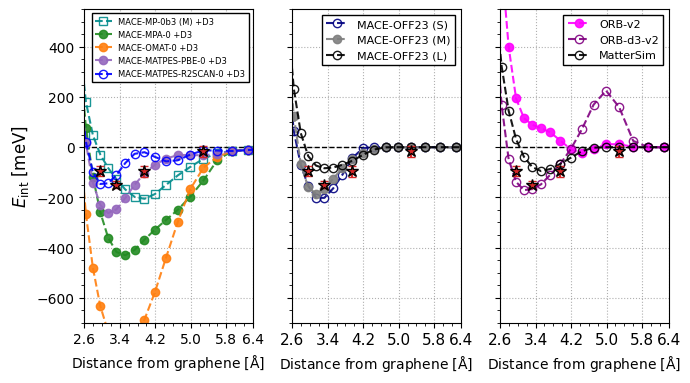

In [13]:
# plot binding curve MLIP

cm = 1/2.54

fig, ax = plt.subplots(1,3,figsize=(17.8*cm,10*cm),sharey=True)

ax[0].axhline(0,ls='dashed',c='black',lw=1)
ax[1].axhline(0,ls='dashed',c='black',lw=1)
ax[2].axhline(0,ls='dashed',c='black',lw=1)

# add  DMC plot 

ax[0].errorbar(x=data_mlip['MACE-MP-0b3'][data_mlip['DMC'][:,0].astype(int),0],y=1000*data_mlip['DMC'][:,1],yerr=1000*data_mlip['DMC'][:,2],
        fmt='*',ms=9,capsize=3,mfc='tab:red',color='tab:red',zorder=10,mec='black')

ax[1].errorbar(x=data_mlip['MACE-MP-0b3'][data_mlip['DMC'][:,0].astype(int),0],y=1000*data_mlip['DMC'][:,1],yerr=1000*data_mlip['DMC'][:,2],
        fmt='*',ms=9,capsize=3,mfc='tab:red',color='tab:red',zorder=10,mec='black')

ax[2].errorbar(x=data_mlip['MACE-MP-0b3'][data_mlip['DMC'][:,0].astype(int),0],y=1000*data_mlip['DMC'][:,1],yerr=1000*data_mlip['DMC'][:,2],
        fmt='*',ms=9,capsize=3,mfc='tab:red',color='tab:red',zorder=10,mec='black')

# plot : ML FORCE FIELDS


ax[0].plot(data_mlip['MACE-MP-0b3'][:,0],1000*data_mlip['MACE-MP-0b3'][:,1],
        's--',ms=6,mfc='none',color='darkcyan',label='MACE-MP-0b3 (M) +D3',alpha=.9)

ax[0].plot(data_mlip['MACE-MPA-0'][:,0],1000*data_mlip['MACE-MPA-0'][:,1],
        'o--',ms=6,mfc='forestgreen',color='forestgreen',label='MACE-MPA-0 +D3',alpha=.9)

ax[0].plot(data_mlip['MACE-OMAT-0'][:,0],1000*data_mlip['MACE-OMAT-0'][:,1],
        'o--',ms=6,mfc='tab:orange',color='tab:orange',label='MACE-OMAT-0 +D3',alpha=.9)


ax[0].plot(data_mlip['MACE-MATPES-PBE-0'][:,0],1000*data_mlip['MACE-MATPES-PBE-0'][:,1],
        'o--',ms=6,mfc='tab:purple',color='tab:purple',label='MACE-MATPES-PBE-0 +D3',alpha=.9)


ax[0].plot(data_mlip['MACE-MATPES-R2SCAN-0'][:,0],1000*data_mlip['MACE-MATPES-R2SCAN-0'][:,1],
        'o--',ms=6,mfc='none',color='blue',label='MACE-MATPES-R2SCAN-0 +D3',alpha=.9)


ax[1].plot(data_mlip['MACE-OFF23 (small)'][:,0],1000*data_mlip['MACE-OFF23 (small)'][:,1],
        'o--',ms=6,mfc='none',color='navy',label='MACE-OFF23 (S)',alpha=.9)
                       
ax[1].plot(data_mlip['MACE-OFF23 (medium)'][:,0],1000*data_mlip['MACE-OFF23 (medium)'][:,1],
        'o--',ms=6,mfc='tab:grey',color='tab:grey',label='MACE-OFF23 (M)',alpha=.9)

ax[1].plot(data_mlip['MACE-OFF23 (large)'][:,0],1000*data_mlip['MACE-OFF23 (large)'][:,1],
        'o--',ms=6,mfc='none',color='black',label='MACE-OFF23 (L)',alpha=.9)

ax[2].plot(data_mlip['ORB-v2'][:,0],1000*data_mlip['ORB-v2'][:,1],
        'o--',ms=6,mfc='magenta',color='magenta',label='ORB-v2',alpha=.9)

ax[2].plot(data_mlip['ORB-d3-v2'][:,0],1000*data_mlip['ORB-d3-v2'][:,1],
        'o--',ms=6,mfc='none',color='purple',label='ORB-d3-v2',alpha=.9)

ax[2].plot(data_mlip['MatterSim'][:,0],1000*data_mlip['MatterSim'][:,1],
        'o--',ms=6,mfc='none',color='black',label='MatterSim',alpha=.9)


# axes limits

ax[0].set_ylim([-700,550])
ax[0].set_xlim([2.6,6.2])
ax[1].set_ylim([-700,550])
ax[1].set_xlim([2.6,6.2])
ax[2].set_ylim([-700,550])
ax[2].set_xlim([2.6,6.2])

# ticks
ax[0].set_xticks([2.6,3.4,4.2,5.0,5.8,6.4])
ax[1].set_xticks([2.6,3.4,4.2,5.0,5.8,6.4])
ax[2].set_xticks([2.6,3.4,4.2,5.0,5.8,6.4])

# minor ticks
ax[0].minorticks_on()
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))  # Adjust for all subplots as needed
ax[1].minorticks_on()
ax[2].minorticks_on()
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))  # Adjust for all subplots as needed
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))  # Adjust for all subplots as needed

ax[0].set_xlabel(r'Distance from graphene [$\mathrm{\AA}$]',fontsize=10)
ax[1].set_xlabel(r'Distance from graphene [$\mathrm{\AA}$]',fontsize=10)
ax[2].set_xlabel(r'Distance from graphene [$\mathrm{\AA}$]',fontsize=10)
ax[0].set_ylabel(r'$E_\text{int}$ [meV]',fontsize=12)

ax[0].tick_params(axis='y', labelsize=10)
ax[1].tick_params(axis='x', labelsize=11)
ax[2].tick_params(axis='x', labelsize=11)

ax[0].legend(fontsize=6,edgecolor='black',fancybox=False,framealpha=1,ncols=1)
ax[1].legend(fontsize=8,edgecolor='black',fancybox=False,framealpha=1,ncols=1)
ax[2].legend(fontsize=8,edgecolor='black',fancybox=False,framealpha=1,ncols=1)

ax[0].grid(ls='dotted')
ax[1].grid(ls='dotted')
ax[2].grid(ls='dotted')

plt.tight_layout()
plt.show()

**Effect of DFT functional for adsorption geoemtry on adsorption energy**

In [14]:
#load data

path_to_vdwdf2_adsorption_geo_data = '../DATA/vdwDF2_ADSORPTION_GEOMETRY/'

b86bpbexdm_on_pbed3 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'BINDING_ENERGY_B86bPBEXDM_on_PBED3')
b86bpbexdm_on_vdwdf2 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'BINDING_ENERGY_B86bPBEXDM_on_vdWDF2')

scanrvv10_on_pbed3 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'BINDING_ENERGY_SCANrVV10_on_PBED3')
scanrvv10_on_vdwdf2 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'BINDING_ENERGY_SCANrVV10_on_vdWDF2')

vdwdf2_on_pbed3 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'/BINDING_ENERGY_vdWDF2_on_PBED3')
vdwdf2_on_vdwdf2 = np.loadtxt(path_to_vdwdf2_adsorption_geo_data+'BINDING_ENERGY_vdWDF2_on_vdWDF2')

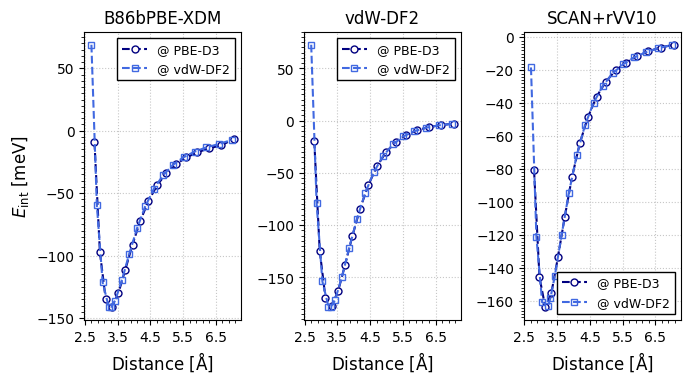

In [15]:
## plot data
cm =1/2.54
start = 2
end = 19
fig, ax = plt.subplots(1,3,figsize=(17.8*cm,10*cm))

# gga
ax[0].plot(b86bpbexdm_on_pbed3[start:end,0],1000*b86bpbexdm_on_pbed3[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='@ PBE-D3')
ax[0].plot(b86bpbexdm_on_vdwdf2[start:end+1,0],1000*b86bpbexdm_on_vdwdf2[start:end+1,1],'s--',
              c='royalblue',mfc='none',ms=5,label='@ vdW-DF2')

ax[0].grid(ls='dotted',alpha=.7)
ax[0].set_xticks([2.5,3.5,4.5,5.5,6.5])

ax[0].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)
ax[0].set_ylabel('$E_\mathrm{int}$ [meV]',fontsize=12)
ax[0].set_title('B86bPBE-XDM',fontsize=12)

# vdw inclusive

ax[1].plot(vdwdf2_on_pbed3[start:end,0],1000*vdwdf2_on_pbed3[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='@ PBE-D3')
ax[1].plot(vdwdf2_on_vdwdf2[start:end+1,0],1000*vdwdf2_on_vdwdf2[start:end+1,1],'s--',
              c='royalblue',mfc='none',ms=5,label='@ vdW-DF2')

ax[1].grid(ls='dotted',alpha=.7)
ax[1].set_xticks([2.5,3.5,4.5,5.5,6.5])

ax[1].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)
ax[1].set_title('vdW-DF2',fontsize=12)

# meta gga 

ax[2].plot(scanrvv10_on_pbed3[start:end,0],1000*scanrvv10_on_pbed3[start:end,1],'o--',
              c='navy',mfc='snow',ms=5,label='@ PBE-D3')
ax[2].plot(scanrvv10_on_vdwdf2[start:end+1,0],1000*scanrvv10_on_vdwdf2[start:end+1,1],'s--',
              c='royalblue',mfc='none',ms=5,label='@ vdW-DF2')

ax[2].grid(ls='dotted',alpha=.7)
ax[2].set_xticks([2.5,3.5,4.5,5.5,6.5])
ax[2].set_xlabel('Distance [$\mathrm{ \AA}$]',fontsize=12)

ax[2].set_title('SCAN+rVV10',fontsize=12)


ax[0].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)
ax[1].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)
ax[2].legend(edgecolor='black',fancybox=False,framealpha=1,fontsize=9)

ax[0].yaxis.set_minor_locator(AutoMinorLocator(10)) 
ax[1].yaxis.set_minor_locator(AutoMinorLocator(10)) 
ax[2].yaxis.set_minor_locator(AutoMinorLocator(10)) 

ax[0].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[1].xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax[2].xaxis.set_minor_locator(AutoMinorLocator(5)) 

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)  # tweak vertical space between rows
plt.show()

**DMC table**

In [16]:
# Extract values
distances = data_mlip['MACE-MP-0b3'][data_mlip['DMC'][:, 0].astype(int), 0]
energies = 1000 * data_mlip['DMC'][:, 1]
errors = 1000 * data_mlip['DMC'][:, 2]

# Start LaTeX table string
latex_table = "\\begin{tabular}{ccc}\n"
latex_table += "\\hline\n"
latex_table += "Distance [$\\mathrm{\\AA}$] & DMC Energy [meV] & DMC Stochastic Error [meV] \\\\\n"
latex_table += "\\hline\n"

# Fill in the table
for d, e, err in zip(distances, energies, errors):
    latex_table += f"{d:.2f} & {e:.0f} & {err:.0f} \\\\\n"

latex_table += "\\hline\n"
latex_table += "\\end{tabular}"

print(latex_table)

\begin{tabular}{ccc}
\hline
Distance [$\mathrm{\AA}$] & DMC Energy [meV] & DMC Stochastic Error [meV] \\
\hline
2.96 & -96 & 21 \\
3.33 & -150 & 14 \\
3.96 & -95 & 22 \\
5.29 & -17 & 22 \\
\hline
\end{tabular}


**DMC vs DFT for water and co2 -- graphene interaction**

In [17]:
## load water + graphene data
path_to_binding_curves = '../DATA/DFT_WATER_ON_GRAPHENE/'

functionals_water_graphene = np.loadtxt(path_to_binding_curves+'graphene_2leg/Energy',usecols=0,dtype=str)

graphene_2leg=np.loadtxt(path_to_binding_curves+'graphene_2leg/Energy',usecols=1)
graphene=np.loadtxt(path_to_binding_curves+'graphene/Energy',usecols=1)
wgraphene_2leg=np.loadtxt(path_to_binding_curves+'w_2leg/Energy',usecols=1)

dmc_graphene_2leg=np.array([-99,6])
binding_graphene_2leg = 1000*(graphene_2leg-graphene-wgraphene_2leg)
delta_graphene_2leg=1000*(graphene_2leg-graphene-wgraphene_2leg)-dmc_graphene_2leg[0]

**Absolute Error DFT vs DMC**

In [18]:
list_of_functionals = [key for key in data.keys() if key != 'DMC']


dmc_co2 = np.array([1000*data['DMC'][1][1],1000*data['DMC'][1][2]])
data_co2_diff_dft_dmc = []

for name in list_of_functionals:
    curve_data = data[name]
    dft_value = round(1000 * curve_data[5, 2])
    diff = dft_value - dmc_co2[0]
    stochastic_dmc = dmc_co2[1]
    
    data_co2_diff_dft_dmc.append(dft_value-dmc_co2[0])
    print(f"{name:20} | DFT error: {diff:6.0f} | Stocastich DMC error: {stochastic_dmc:.0f}")

PBE                  | DFT error:    151 | Stocastich DMC error: 14
PBE-D3               | DFT error:    -11 | Stocastich DMC error: 14
PBE-MBD              | DFT error:     27 | Stocastich DMC error: 14
revPBE-D3            | DFT error:    -10 | Stocastich DMC error: 14
B86bPBE-XDM          | DFT error:      9 | Stocastich DMC error: 14
vdW-DF2              | DFT error:    -27 | Stocastich DMC error: 14
rev-vdW-DF2          | DFT error:     -7 | Stocastich DMC error: 14
optB86b-vdW          | DFT error:    -66 | Stocastich DMC error: 14
optB88-vdW           | DFT error:    -63 | Stocastich DMC error: 14
SCAN                 | DFT error:     66 | Stocastich DMC error: 14
SCAN+rVV10           | DFT error:     -5 | Stocastich DMC error: 14
R2SCAN               | DFT error:     76 | Stocastich DMC error: 14
R2SCAN-D3            | DFT error:    -17 | Stocastich DMC error: 14
PBE0-D3-ATM          | DFT error:     -3 | Stocastich DMC error: 14
B3LYP-D3-ATM         | DFT error:    -15 | Stoca

**Error DFT vs DMC on CO2-Water**

In [19]:
delta_dmc = dmc_co2[0] - dmc_graphene_2leg[0]
delta_dmc_error = np.sqrt( dmc_co2[1]**2 + dmc_graphene_2leg[1]**2)

data_co2_water_diff_dft_dmc = []

for name in list_of_functionals:
    curve_data = data[name]
    co2_dft_value = round(1000 * curve_data[5, 2])
    
    if name in functionals_water_graphene:
        idx = np.where(functionals_water_graphene == name)[0][0]  # find the index
        h2o_dft_value = round(binding_graphene_2leg[idx])
        
    diff = co2_dft_value - h2o_dft_value
    diff_w_dmc = diff - delta_dmc
    stochastic_dmc = delta_dmc_error
    data_co2_water_diff_dft_dmc.append(diff-delta_dmc)
                                        
    print(f"{name:20} | DFT diff: {diff:6.0f} |  DFT error: {diff_w_dmc:6.0f}  | Stocastich DMC error: {stochastic_dmc:.0f}")

PBE                  | DFT diff:     20 |  DFT error:     71  | Stocastich DMC error: 15
PBE-D3               | DFT diff:    -17 |  DFT error:     34  | Stocastich DMC error: 15
PBE-MBD              | DFT diff:      4 |  DFT error:     55  | Stocastich DMC error: 15
revPBE-D3            | DFT diff:    -14 |  DFT error:     37  | Stocastich DMC error: 15
B86bPBE-XDM          | DFT diff:    -17 |  DFT error:     34  | Stocastich DMC error: 15
vdW-DF2              | DFT diff:    -50 |  DFT error:      1  | Stocastich DMC error: 15
rev-vdW-DF2          | DFT diff:    -43 |  DFT error:      8  | Stocastich DMC error: 15
optB86b-vdW          | DFT diff:    -67 |  DFT error:    -16  | Stocastich DMC error: 15
optB88-vdW           | DFT diff:    -67 |  DFT error:    -16  | Stocastich DMC error: 15
SCAN                 | DFT diff:      0 |  DFT error:     51  | Stocastich DMC error: 15
SCAN+rVV10           | DFT diff:    -27 |  DFT error:     24  | Stocastich DMC error: 15
R2SCAN               

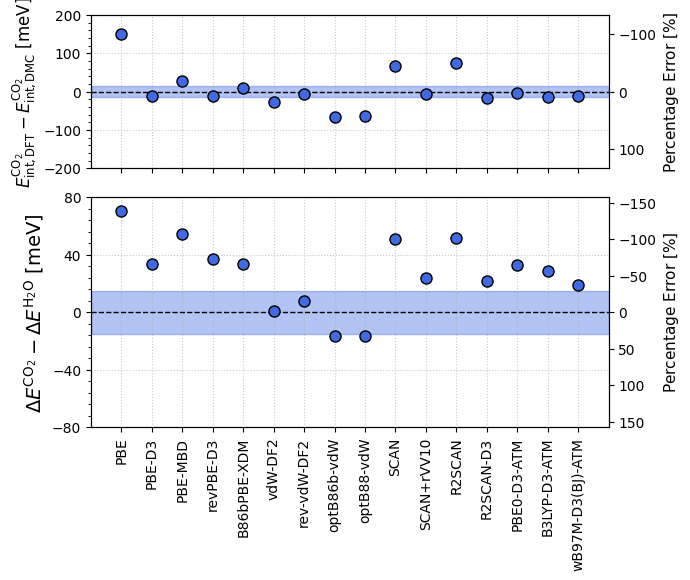

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(2, 1, figsize=(17.8*cm, 15*cm), gridspec_kw={'height_ratios': [1, 1.5]})

# Main horizontal reference lines
ax[0].axhline(0, ls='dashed', color='black', lw=1)
ax[1].axhline(0, ls='dashed', color='black', lw=1)

# Plotting data
ax[0].plot(range(len(data_co2_diff_dft_dmc)), np.array(data_co2_diff_dft_dmc),
           'o', color='royalblue', mec='black', ms=8)
ax[0].axhspan(ymin=-dmc_co2[1], ymax=dmc_co2[1], color='royalblue', alpha=0.4)

ax[1].plot(range(len(data_co2_water_diff_dft_dmc)), np.array(data_co2_water_diff_dft_dmc),
           'o', color='royalblue', mec='black', ms=8)
ax[1].axhspan(ymin=-delta_dmc_error, ymax=delta_dmc_error, color='royalblue', alpha=0.4)

# Axis limits and ticks
ax[0].set_ylim([-200, 200])
ax[0].set_yticks([-200, -100, 0, 100, 200])

ax[1].set_ylim([-80, 80])
ax[1].set_yticks([-80, -40, 0, 40, 80])

ax[0].set_xticks(range(len(data_co2_diff_dft_dmc)), [])
ax[1].set_xticks(range(len(data_co2_diff_dft_dmc)), list_of_functionals, rotation=90)
ax[1].set_xlim(-1, len(data_co2_diff_dft_dmc))
ax[0].set_xlim(-1, len(data_co2_diff_dft_dmc))

# Labels
ax[0].set_ylabel('$E^{\\mathrm{CO}_2}_{\\mathrm{int},\\mathrm{DFT}} - E^{\\mathrm{CO}_2}_{\\mathrm{int},\\mathrm{DMC}}$ [meV]',
                fontsize=12)
ax[1].set_ylabel('$\\Delta E^{\\mathrm{CO}_2} - \\Delta E^{\\mathrm{H}_2\\mathrm{O}}$ [meV]', fontsize=14)

# Grid and minor ticks
ax[0].grid(ls='dotted', alpha=.7)
ax[1].grid(ls='dotted', alpha=.7)
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(5))

# === Secondary y-axes for percentage error ===
secax0 = ax[0].twinx()
secax1 = ax[1].twinx()

secax0.set_ylim([100*y/(dmc_co2[0]) for y in [-200, 200]])
secax1.set_ylim([100*y/(delta_dmc) for y in [-80, 80]])

secax0.set_ylabel('Percentage Error [$\%$]', fontsize=11)
secax1.set_ylabel('Percentage Error [$\%$]', fontsize=11)

plt.tight_layout()
plt.show()

**Test on Random Adsorption Configurations**

In [21]:
# define compute angle and distance function 
from ase.geometry import distance
from ase.io import read 
from copy import deepcopy 

def compute_distance_and_angle(atoms):
    """
    Computes the XY-plane distance between the CO2 carbon atom and the closest carbon atom in graphene,
    and the angle between the CO2 molecule and the X-axis in the XY-plane.
    
    Parameters:
    atoms (ase.Atoms): The input atomic configuration containing graphene + CO2.
    
    Returns:
    tuple: (distance, angle) where distance is the XY-plane distance and angle is the angle in degrees.
    """
    # Identify CO2 and graphene atoms based on z-coordinate
    co2_indices = [i for i, pos in enumerate(atoms.positions) if pos[2] > 1.0]
    gra_indices = [i for i, pos in enumerate(atoms.positions) if pos[2] <= 1.0]
    
    if len(co2_indices) != 3:
        raise ValueError("Expected 3 CO2 atoms, but found a different number.")
    
    # Extract the positions of the CO2 and graphene atoms
    co2_positions = atoms.positions[co2_indices]
    gra_positions = atoms.positions[gra_indices]
    
    # Identify the Carbon atom in CO2 (assume the first atom is the C atom in CO2)
    symbols = atoms.get_chemical_symbols()
    carbon_index_co2 = next(i for i in co2_indices if symbols[i] == "C")
    co2_carbon_position = atoms.positions[carbon_index_co2]
    
    # Find the closest graphene carbon atom in the XY plane
    graphene_carbons = [i for i in gra_indices if symbols[i] == "C"]
    
    # Initialize minimum distance and index of closest carbon
    min_distance = float('inf')
    closest_carbon_index = None
    
    # Loop through each graphene carbon and compute the distance using ASE's get_distance
    for gra_idx in graphene_carbons:
        dist = atoms.get_distance(carbon_index_co2, gra_idx, mic=True)  # Periodic boundary conditions are considered here
        if dist < min_distance:
            min_distance = dist
            closest_carbon_index = gra_idx
    
    # Compute the XY distance (ignoring the z-component)
    co2_xy_position = co2_carbon_position[:2]  # Take only the XY coordinates
    closest_carbon_position = atoms.positions[closest_carbon_index][:2]  # Take only the XY coordinates
    distance_xy = np.linalg.norm(co2_xy_position - closest_carbon_position)
    
    # Compute the angle between the CO2 molecule and the X-axis in the XY plane
    co2_axis_vector = co2_positions[1] - co2_positions[0]  # Vector between two oxygen atoms of CO2
    co2_axis_vector_xy = co2_axis_vector[:2]  # Take only the XY components
    
    # Compute the unit vector of the CO2 axis in the XY plane
    unit_co2_axis = co2_axis_vector_xy / np.linalg.norm(co2_axis_vector_xy)
    
    # X-axis in the XY plane is simply [1, 0]
    x_axis = np.array([1, 0])
    
    # Compute the angle using the dot product formula
    dot_product = np.dot(unit_co2_axis, x_axis)
    angle_rad = np.arccos(dot_product)
    angle_deg = np.degrees(angle_rad)  # Convert the angle from radians to degrees
    
    # Ensure the angle is constrained between 0-90 degrees
    if angle_deg > 90:
        angle_deg = 180 - angle_deg  # We take the smallest angle (90 degrees mirror symmetry)
    
    return distance_xy, angle_deg

In [22]:
# load data

###  revPBE-D3
traj_revpbed3 = read('../DATA/CO2_RANDOM_ADSORPTION_CONFIGURATIONS/traj_min_mp0_revpbed3.extxyz',':')
data_revpbed3 = []
for i in range(len(traj_revpbed3)):
    
    xy_distance, angle = compute_distance_and_angle(deepcopy(traj_revpbed3[i]))
    energy = traj_revpbed3[i].get_potential_energy()
    
    data_revpbed3.append([xy_distance,angle,energy])
    
data_revpbed3 = np.array(data_revpbed3)

### PBE-D3
traj_pbed3 = read('../DATA/CO2_RANDOM_ADSORPTION_CONFIGURATIONS/traj_min_mp0_pbed3.extxyz',':')
data_pbed3 = []
for i in range(len(traj_pbed3)):
    
    xy_distance, angle = compute_distance_and_angle(deepcopy(traj_pbed3[i]))
    energy = traj_pbed3[i].get_potential_energy()
    
    data_pbed3.append([xy_distance,angle,energy])
    
data_pbed3 = np.array(data_pbed3)

### vdW-DF2
traj_vdwdf2 = read('../DATA/CO2_RANDOM_ADSORPTION_CONFIGURATIONS/traj_min_mp0_vdwdf2.extxyz',':')
data_vdwdf2 = []
for i in range(len(traj_vdwdf2)):
    
    xy_distance, angle = compute_distance_and_angle(deepcopy(traj_vdwdf2[i]))
    energy = traj_vdwdf2[i].get_potential_energy()
    
    data_vdwdf2.append([xy_distance,angle,energy])
    
data_vdwdf2 = np.array(data_vdwdf2)

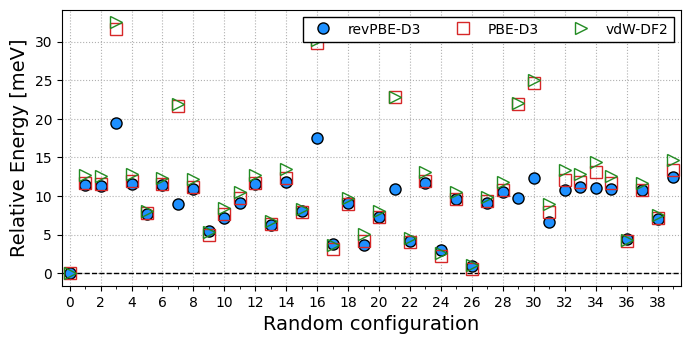

In [23]:
# plot energy vs configuration

cm = 1/2.54

fig, ax = plt.subplots(figsize=(17.8*cm,9*cm))

#PLOT 
x= np.arange(len(data_pbed3))

ax.axhline(0,ls='dashed',lw=1,color='black')
ax.plot(x,1000*( data_revpbed3[:,2]-data_revpbed3[0,2]), 'o',ms=8,mec='black',c='dodgerblue',label='revPBE-D3',mew=1.)
ax.plot(x,1000*( data_pbed3[:,2]-data_pbed3[0,2]), 's',ms=8,mec='tab:red',mfc='none',label='PBE-D3',mew=1.)
ax.plot(x,1000*( data_vdwdf2[:,2]-data_vdwdf2[0,2]), '>',ms=8,mec='forestgreen',mfc='none',label='vdW-DF2',mew=1.)

    
# AXES TICKS
ax.set_ylabel(r'Relative Energy [meV]',fontsize=14)
ax.set_xlabel(r'Random configuration',fontsize=14)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(x[::2])
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlim([-0.5,39.5])
# LEGEND AND GRID
ax.grid(ls='dotted')
ax.legend(fontsize=10,fancybox=False,edgecolor='black',framealpha=1,ncols=3)
plt.tight_layout()
plt.show()

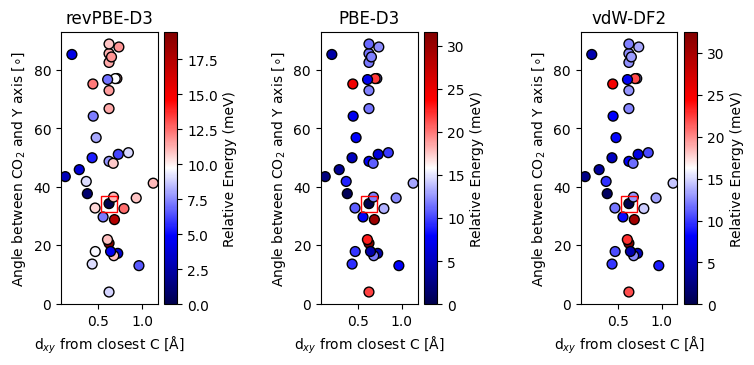

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1, 3, figsize=(21*cm, 9*cm))
plt.subplots_adjust(wspace=1.15)  # Increase horizontal space between subplots

datasets = [
    (data_revpbed3, "revPBE-D3"),
    (data_pbed3, "PBE-D3"),
    (data_vdwdf2, "vdW-DF2")
]

for ax, (data, title) in zip(axs, datasets):
    x = data[:, 0]
    y = data[:, 1]
    color = 1000 * (data[:, 2] - data[0,2])

    scatter = ax.scatter(x, y, c=color, cmap='seismic', s=50, edgecolors='k')
    ax.plot(data[0, 0], data[0, 1], 's', ms=12, mfc='none', mec='red')

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Relative Energy (meV)')

    ax.set_title(title)
    ax.set_xlabel('d$_{xy}$ from closest C [$\mathrm{ \AA}$]')
    ax.set_ylabel('Angle between CO$_2$ and Y axis [$\circ$]')

    # Disable scientific notation on both axes
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='both')
plt.show()

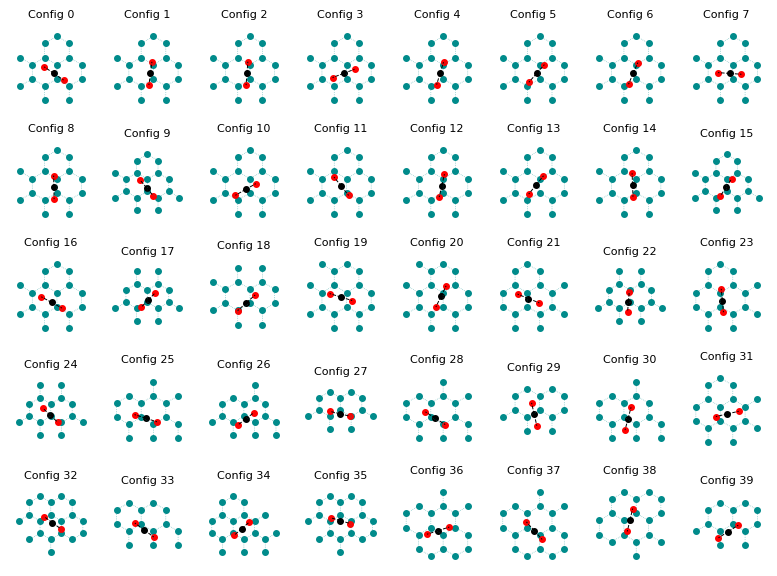

In [25]:
# plot the random configurations
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from matplotlib.patches import Rectangle

# Load trajectory (replace filename if needed)
trajectory = traj_pbed3

# --- Figure setup ---
n_frames = len(trajectory)
ncols = 8
nrows = int(np.ceil(n_frames / ncols))
cm = 1 / 2.54
fig, axes = plt.subplots(nrows, ncols, figsize=(20 * cm, 15 * cm))
axes = axes.flatten()

# --- Parameters ---
cutoff = 4.0  # Å radius to include atoms near CO₂
bond_cutoff = 1.6  # Å max bond length
z_tolerance = 0.5  # Å tolerance to consider atoms in the same plane

for i, atoms in enumerate(trajectory):
    # --- Identify CO2 atoms in the unit cell ---
    co2_atoms = [atom.index for atom in atoms if atom.symbol in ['C', 'O'] and atom.position[2] > 2.5]
    co2 = atoms[co2_atoms]
    com = co2.get_center_of_mass()

    # --- Build supercell to capture neighbors ---
    supercell_atoms = atoms * (1, 2, 1)
    positions = supercell_atoms.get_positions()

    # --- Select atoms within XY cutoff ---
    dists = np.linalg.norm(positions[:, :2] - com[:2], axis=1)
    mask = dists < cutoff
    local_atoms = supercell_atoms[mask]
    pos = local_atoms.get_positions()

    ax = axes[i]
    ax.axis('off')
    ax.set_title(f'Config {i}', fontsize=8)
    ax.set_aspect('equal')

    # --- Plot atoms ---
    for atom in local_atoms:
        x, y = atom.position[:2]
        if atom.symbol == 'O':
            color = 'red'
        elif atom.symbol == 'C':
            if any(np.allclose(atom.position, atoms[idx].position, atol=0.1) for idx in co2_atoms):
                color = 'black'  # CO₂ carbon
            else:
                color = 'darkcyan'  # graphene carbon
        else:
            color = 'blue'
        ax.plot(x, y, 'o', markersize=4, color=color)

    # --- Plot bonds ---
    co2_positions = [atoms[idx].position for idx in co2_atoms]
    for j in range(len(local_atoms)):
        for k in range(j + 1, len(local_atoms)):
            dist_xy = np.linalg.norm(pos[j, :2] - pos[k, :2])
            z_diff = abs(pos[j, 2] - pos[k, 2])
            if dist_xy < bond_cutoff and z_diff < z_tolerance:
                is_j_co2 = any(np.allclose(local_atoms[j].position, p, atol=0.1) for p in co2_positions)
                is_k_co2 = any(np.allclose(local_atoms[k].position, p, atol=0.1) for p in co2_positions)
                if is_j_co2 and is_k_co2:
                    ax.plot([pos[j, 0], pos[k, 0]], [pos[j, 1], pos[k, 1]],
                            color='black', linewidth=0.7, linestyle='--')
                elif not is_j_co2 and not is_k_co2:
                    ax.plot([pos[j, 0], pos[k, 0]], [pos[j, 1], pos[k, 1]],
                            color='darkcyan', linewidth=0.5, alpha=0.6, linestyle='dotted')

    # --- Set square bounds around atoms ---
    min_x, max_x = pos[:, 0].min(), pos[:, 0].max()
    min_y, max_y = pos[:, 1].min(), pos[:, 1].max()
    pad = 1.0
    width = max_x - min_x + 2 * pad
    height = max_y - min_y + 2 * pad
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    ax.set_xlim(center_x - width / 2, center_x + width / 2)
    ax.set_ylim(center_y - height / 2, center_y + height / 2)

# --- Hide unused axes ---
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()